In [2]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 2.6 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=3203a57f4e6db8da885b6448764543379f83cbb123db00f390e10e8f9e3a68ad
  Stored in directory: /Users/nirweingarten/Library/Caches/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52359 sha256=1a2e48f4e624128a238b761efddd23126c32bcf603a3dc6e362adb77e9dc14da
  Stored in directory: /Users/nirweingarten/Library/Caches/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [5]:
import numpy as np
import torch
import math
import umap.umap_ as umap
import os
import pickle
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
from torch.autograd import Variable
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torchvision import transforms
from pathlib import Path
import torch.nn.init as init
from torch.nn.parameter import Parameter
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import modules.utils as utils
import modules.models as models

In [6]:
DATA_DIR = os.path.join('..', 'datasets', 'FMNIST_DATASET')
BATCH_SIZE = 200
SEED = 42
LOAD_MODEL = False
LR = 1e-4
EPOCHS = 200
BETA = 1e-3

In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

if os.path.isdir(DATA_DIR):
    try:
        train_data = FashionMNIST(root=DATA_DIR, train=True, transform=transforms.ToTensor())
        test_data = FashionMNIST(root=DATA_DIR, train=False, transform=transforms.ToTensor())
    except:
        train_data = FashionMNIST(root=DATA_DIR, train=True, download=True, transform=transforms.ToTensor())
        test_data = FashionMNIST(root=DATA_DIR, train=False, download=True, transform=transforms.ToTensor())
else:
    os.mkdir(DATA_DIR)
    train_data = FashionMNIST(root=DATA_DIR, train=True, download=True, transform=transforms.ToTensor())
    test_data = FashionMNIST(root=DATA_DIR, train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(train_data,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=1,
                          drop_last=True)

test_loader = DataLoader(test_data,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=1,
                         drop_last=False)

FMNIST_CLASSES = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [47]:
MODEL_SAVE_PATH = os.path.join('..', 'saved_models', 'fmnist_vanilla_vae.h5')
PICKLE_SAVE_PATH = os.path.join('..', 'pickles', 'vanilla_vae.pkl')
K = 256
torch.manual_seed(SEED)
np.random.seed(SEED)
vanilla_model = models.FMNIST_VANILA_VAE(K, device).to(device)
vanilla_model = utils.train_model_vae(EPOCHS, vanilla_model, train_loader, 
                          test_loader, device, LR, MODEL_SAVE_PATH, BETA)
utils.pickle_model_stats(vanilla_model, PICKLE_SAVE_PATH)

[epoch 0]
batch loss:30858.23
batch loss:5052.19
batch loss:3854.15
TEST RESULTS: epoch loss:3557.01
[epoch 1]
batch loss:3278.51
batch loss:3193.32
batch loss:2855.73
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_vanilla_vae.h5
TEST RESULTS: epoch loss:2669.15
[epoch 2]
batch loss:2590.06
batch loss:2573.99
batch loss:2426.46
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_vanilla_vae.h5
TEST RESULTS: epoch loss:2254.83
[epoch 3]
batch loss:2231.63
batch loss:2079.17
batch loss:1929.08
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_vanilla_vae.h5
TEST RESULTS: epoch loss:1951.78
[epoch 4]
batch loss:1819.31
batch loss:2161.68
batch loss:1957.83
TEST RESULTS: epoch loss:2039.15
[epoch 5]
batch loss:1895.16
batch loss:1665.74
batch loss:1612.51
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_vanilla_vae.h5
TEST RESULTS: epoch loss:1661.03
[epoch 6]
batch loss:1600.73
batch loss:1558.47
batch loss:

In [48]:
MODEL_SAVE_PATH = os.path.join('..', 'saved_models', 'fmnist_gmm_vae.h5')
PICKLE_SAVE_PATH = os.path.join('..', 'pickles', 'gmm_vae.pkl')
K = 64
W = 4
torch.manual_seed(SEED)
np.random.seed(SEED)
gmm_model = models.FMNIST_GMM_VAE(K, W, device).to(device)
gmm_model = utils.train_model_vae(EPOCHS, gmm_model, train_loader, 
                          test_loader, device, LR, MODEL_SAVE_PATH, BETA)
utils.pickle_model_stats(gmm_model, PICKLE_SAVE_PATH)

[epoch 0]
batch loss:26774.05
batch loss:6316.70
batch loss:4836.13
TEST RESULTS: epoch loss:4000.05
[epoch 1]
batch loss:4148.82
batch loss:3518.62
batch loss:3219.71
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_gmm_vae.h5
TEST RESULTS: epoch loss:3236.15
[epoch 2]
batch loss:3130.27
batch loss:2954.22
batch loss:3139.32
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_gmm_vae.h5
TEST RESULTS: epoch loss:2770.71
[epoch 3]
batch loss:2587.37
batch loss:2686.84
batch loss:2418.37
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_gmm_vae.h5
TEST RESULTS: epoch loss:2563.10
[epoch 4]
batch loss:2510.77
batch loss:2389.43
batch loss:2247.02
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_gmm_vae.h5
TEST RESULTS: epoch loss:2274.62
[epoch 5]
batch loss:2214.70
batch loss:2239.56
batch loss:2243.88
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_gmm_vae.h5
TEST RESULTS: epoch loss:22

In [49]:
MODEL_SAVE_PATH = os.path.join('..', 'saved_models', 'fmnist_double_vae.h5')
PICKLE_SAVE_PATH = os.path.join('..', 'pickles', 'double_vae.pkl')
K = 256
torch.manual_seed(SEED)
np.random.seed(SEED)
double_model = models.FMNIST_2STOCHASTIC_VAE(K, device).to(device)
double_model = utils.train_model_vae(EPOCHS, double_model, train_loader, 
                          test_loader, device, LR, MODEL_SAVE_PATH, BETA)
utils.pickle_model_stats(double_model, PICKLE_SAVE_PATH)

[epoch 0]
batch loss:28489.23
batch loss:5673.52
batch loss:4406.33
TEST RESULTS: epoch loss:3863.17
[epoch 1]
batch loss:3957.20
batch loss:3544.22
batch loss:2967.32
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_double_vae.h5
TEST RESULTS: epoch loss:2922.90
[epoch 2]
batch loss:2894.58
batch loss:3130.01
batch loss:2567.52
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_double_vae.h5
TEST RESULTS: epoch loss:2662.09
[epoch 3]
batch loss:2622.45
batch loss:2409.15
batch loss:2308.74
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_double_vae.h5
TEST RESULTS: epoch loss:2208.66
[epoch 4]
batch loss:2081.03
batch loss:2204.17
batch loss:2032.27
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_double_vae.h5
TEST RESULTS: epoch loss:2098.60
[epoch 5]
batch loss:1973.03
batch loss:2042.16
batch loss:1871.77
Saved model to /content/drive/MyDrive/AML_project/saved_models/fmnist_double_vae.h5
TEST RESULTS

### Load saved models

In [5]:
VANILLA_SAVE_PATH = os.path.join('..', 'saved_models', 'fmnist_vanilla_vae.h5')
GMM_SAVE_PATH = os.path.join('..', 'saved_models', 'fmnist_gmm_vae.h5')
DOUBLE_SAVE_PATH = os.path.join('..', 'saved_models', 'fmnist_double_vae.h5')
vanilla_model = torch.load(VANILLA_SAVE_PATH)
gmm_model = torch.load(GMM_SAVE_PATH)
double_model = torch.load(DOUBLE_SAVE_PATH)
vanilla_model.eval()
gmm_model.eval()
double_model.eval()

### TSNE and UMAP

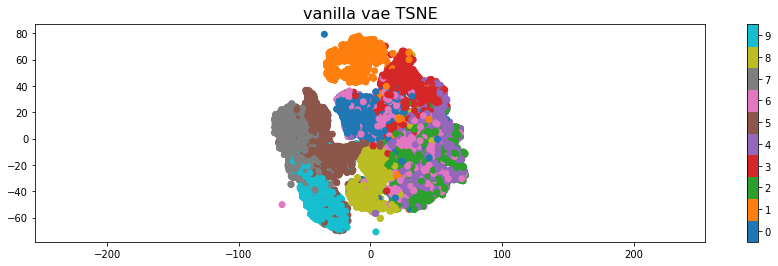

In [121]:
vanilla_tsne = utils.plot_casted_embeddings(vanilla_model, train_loader,
                                  device, FMNIST_CLASSES, 'vanilla vae TSNE',
                                  method='tsne')

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


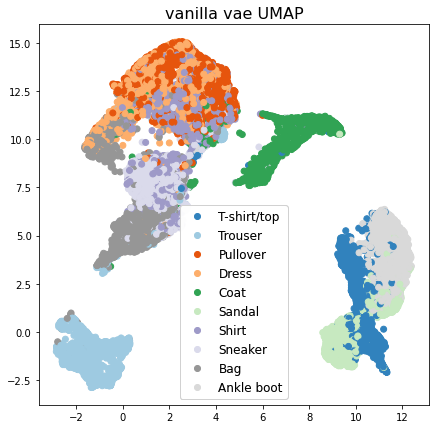

In [45]:
vanilla_umap = utils.plot_casted_embeddings(vanilla_model, train_loader,
                                  device, FMNIST_CLASSES, 'vanilla vae UMAP',
                                  method='umap')

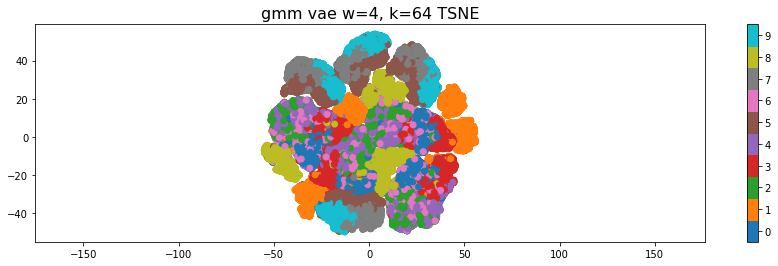

In [128]:
gmm_tsne = utils.plot_casted_embeddings(gmm_model, train_loader,
                                  device, FMNIST_CLASSES, 'gmm vae w=4, k=64 TSNE',
                                  method='tsne')

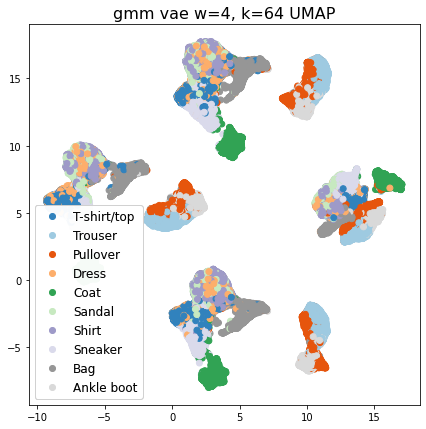

In [46]:
gmm_umap = utils.plot_casted_embeddings(gmm_model, train_loader,
                                  device, FMNIST_CLASSES, 'gmm vae w=4, k=64 UMAP',
                                  method='umap')

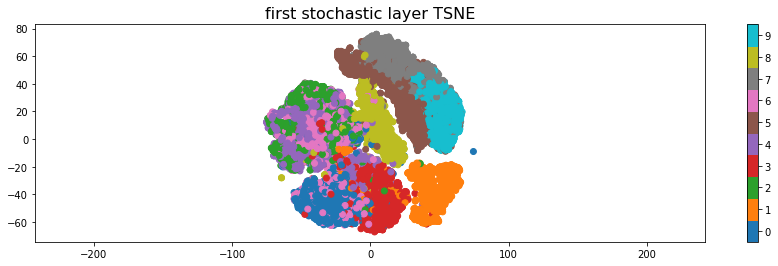

In [133]:
double_tsne1 = utils.plot_casted_embeddings(double_model, train_loader,
                                  device, FMNIST_CLASSES, 'first stochastic layer TSNE',
                                  method='tsne', take_stochastic=1)

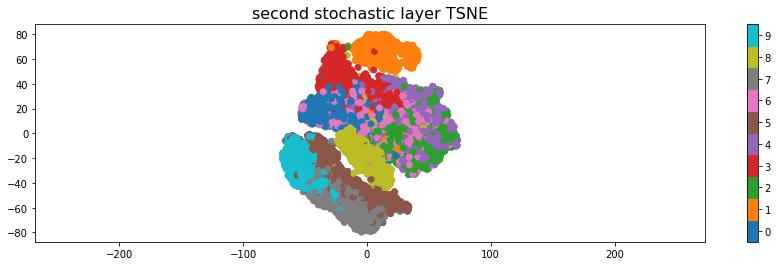

In [139]:
double_tsne2 = utils.plot_casted_embeddings(double_model, train_loader,
                                  device, FMNIST_CLASSES, 'second stochastic layer TSNE',
                                  method='tsne', take_stochastic=2)

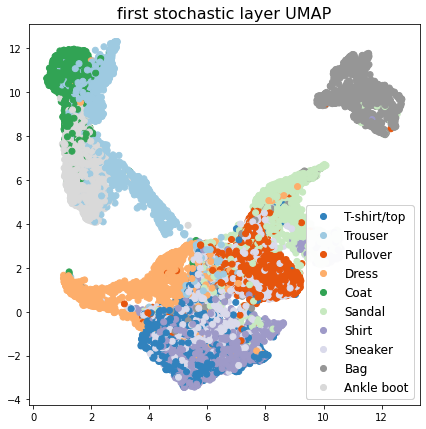

In [47]:
double_umap1 = utils.plot_casted_embeddings(double_model, train_loader,
                                  device, FMNIST_CLASSES, 'first stochastic layer UMAP',
                                  method='umap', take_stochastic=1)

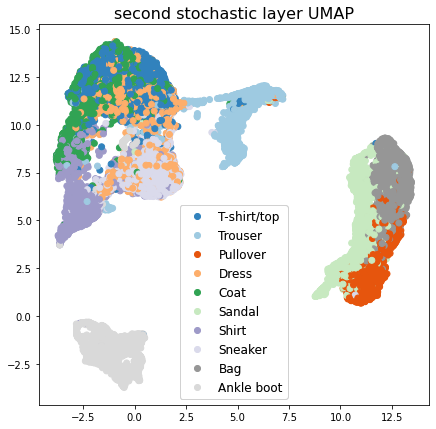

In [48]:
double_umap2 = utils.plot_casted_embeddings(double_model, train_loader,
                                  device, FMNIST_CLASSES, 'second stochastic layer UMAP',
                                  method='umap', take_stochastic=2)

### Demonstrating and comparing models

In [6]:
images, labels = next(iter(train_loader))

#### Item reconstruction

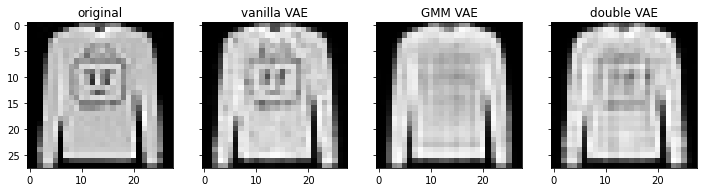

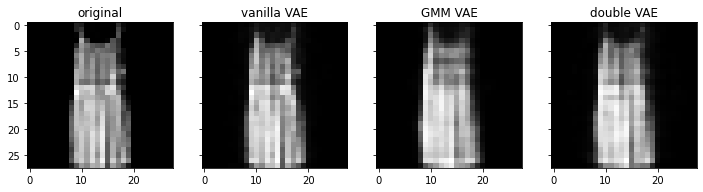

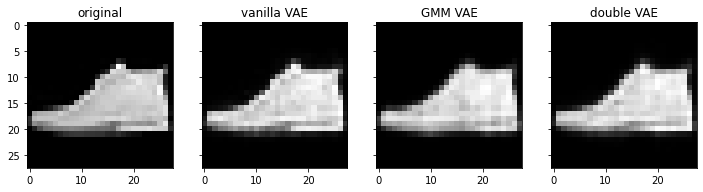

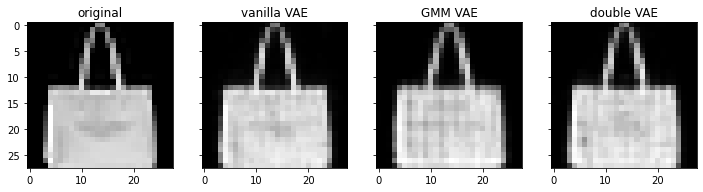

In [30]:
for i in range(1,5):
    x = images[i]
    (_, _), vanilla_x = vanilla_model(x.cuda())
    (_, _), gmm_x, _ = gmm_model(x.cuda())
    (_, _), (_, _), double_x = double_model(x.cuda())
    utils.display([x, vanilla_x, gmm_x, double_x], 4,
                ['original', 'vanilla VAE', 'GMM VAE', 'double VAE'],
                size=(12,12))

#### Item generation

Sigma is augmented to produce varying results

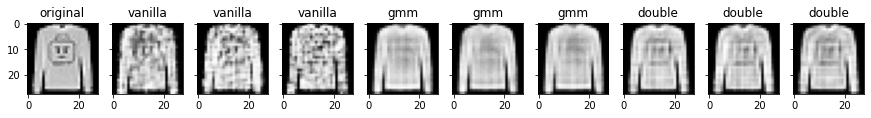

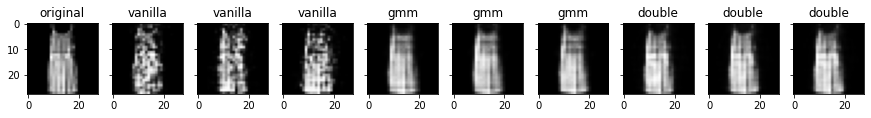

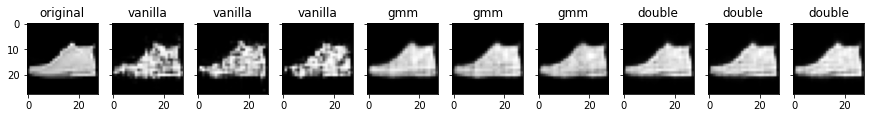

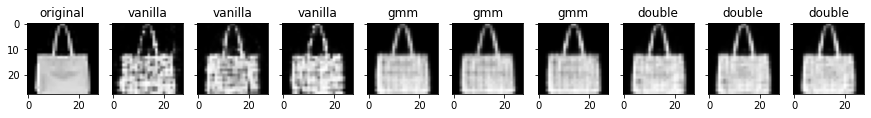

In [43]:
SIGMA_CONST = 10
vanilla_model.train()
gmm_model.train()
double_model.train()
for i in range(1,5):
    x = images[i]
    (vanilla_mu, vanilla_sigma), _ = vanilla_model(x.cuda())
    (gmm_mu, gmm_sigma), _, weights = gmm_model(x.cuda())
    (_, _), (double_mu, double_sigma), _ = double_model(x.cuda())
    vanilla_sigma *= SIGMA_CONST
    gmm_sigma *= SIGMA_CONST
    double_sigma *= SIGMA_CONST

    vanilla_z1 = torch.normal(vanilla_mu, vanilla_sigma).to(device)
    vanilla_z2 = torch.normal(vanilla_mu, vanilla_sigma).to(device)
    vanilla_z3 = torch.normal(vanilla_mu, vanilla_sigma).to(device)
    gmm_z1, _ = gmm_model.gmm(utils.reparametrize(gmm_mu, gmm_sigma, device))
    gmm_z2, _ = gmm_model.gmm(utils.reparametrize(gmm_mu, gmm_sigma, device))
    gmm_z3, _ = gmm_model.gmm(utils.reparametrize(gmm_mu, gmm_sigma, device))
    double_z1 = torch.normal(double_mu, double_sigma).to(device)
    double_z2 = torch.normal(double_mu, double_sigma).to(device)
    double_z3 = torch.normal(double_mu, double_sigma).to(device)

    vanilla_x1 = vanilla_model.decoder(vanilla_z1)
    vanilla_x2 = vanilla_model.decoder(vanilla_z2)
    vanilla_x3 = vanilla_model.decoder(vanilla_z3)
    gmm_x1 = gmm_model.decoder(gmm_z1)
    gmm_x2 = gmm_model.decoder(gmm_z2)
    gmm_x3 = gmm_model.decoder(gmm_z3)
    double_x1 = double_model.decoder(double_z1)
    double_x2 = double_model.decoder(double_z2)
    double_x3 = double_model.decoder(double_z3)

    utils.display([x, vanilla_x1, vanilla_x2, vanilla_x3,
                   gmm_x1, gmm_x2, gmm_x3,
                   double_x1, double_x2, double_x3], 10,
                ['original'] + ['vanilla']*3 + ['gmm']*3 + ['double']*3,
                size=(15,15))

#### Inverse UMAP
Samples are generated from the inverse of the umap function in cherry picked locations

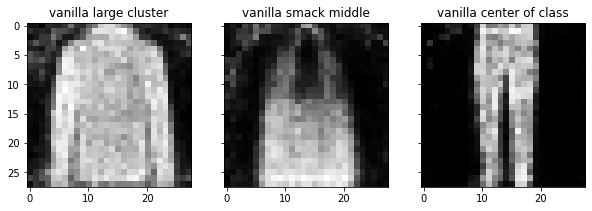

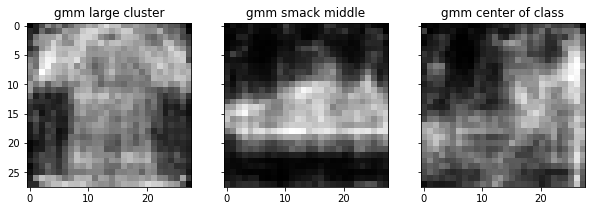

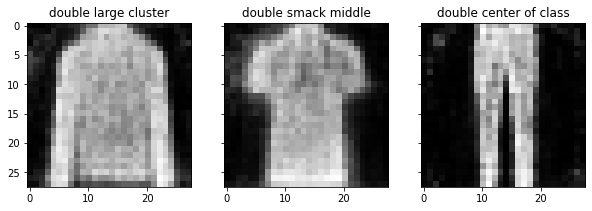

In [52]:
vanilla_x1 = vanilla_model.decoder(torch.tensor(vanilla_umap.inverse_transform([[2.5,12.5]])).to(device)) # largest cluster
vanilla_x2 = vanilla_model.decoder(torch.tensor(vanilla_umap.inverse_transform([[5,5]])).to(device)) # smack middle
vanilla_x3 = vanilla_model.decoder(torch.tensor(vanilla_umap.inverse_transform([[-1.5,-1.25]])).to(device)) # center of class
gmm_x1 = gmm_model.decoder(torch.tensor(gmm_umap.inverse_transform([[2.5,14]])).to(device)) # largest cluster
gmm_x2 = gmm_model.decoder(torch.tensor(gmm_umap.inverse_transform([[5,5]])).to(device)) # smack moddle
gmm_x3 = gmm_model.decoder(torch.tensor(gmm_umap.inverse_transform([[10.5,-4]])).to(device)) # center of class
double_x1 = double_model.decoder(torch.tensor(double_umap2.inverse_transform([[-1,12]])).to(device)) # largest cluster
double_x2 = double_model.decoder(torch.tensor(double_umap2.inverse_transform([[5,5]])).to(device)) # smack moddle
double_x3 = double_model.decoder(torch.tensor(double_umap2.inverse_transform([[-1,-2]])).to(device)) # center of class

utils.display([vanilla_x1, vanilla_x2, vanilla_x3], 3, ['vanilla large cluster', 'vanilla smack middle', 'vanilla center of class'], size=(10,10))
utils.display([gmm_x1, gmm_x2, gmm_x3], 3, ['gmm large cluster', 'gmm smack middle', 'gmm center of class'], size=(10,10))
utils.display([double_x1, double_x2, double_x3], 3, ['double large cluster', 'double smack middle', 'double center of class'], size=(10,10))

#### Item manipulation

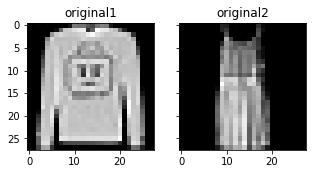

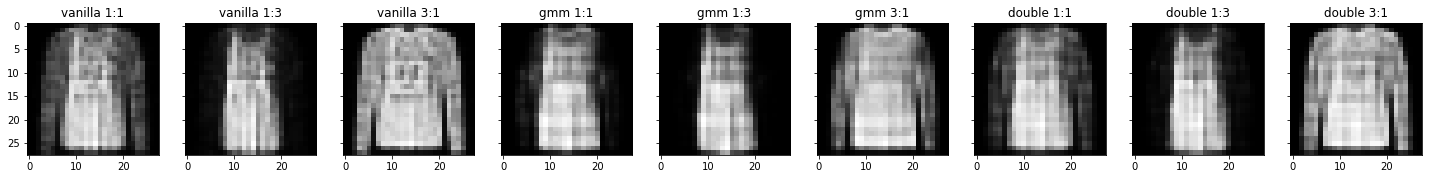

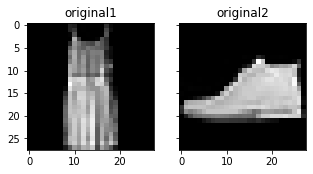

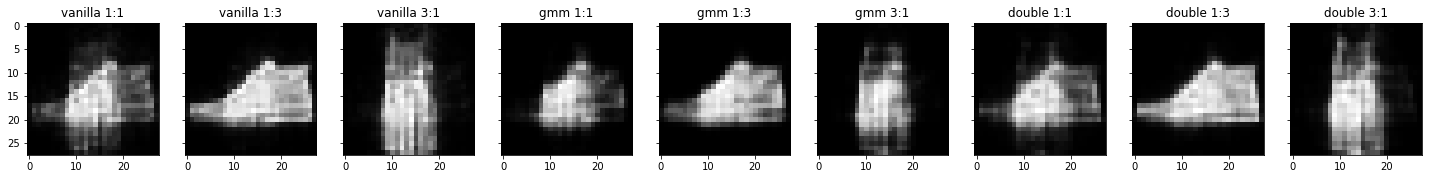

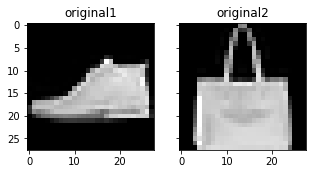

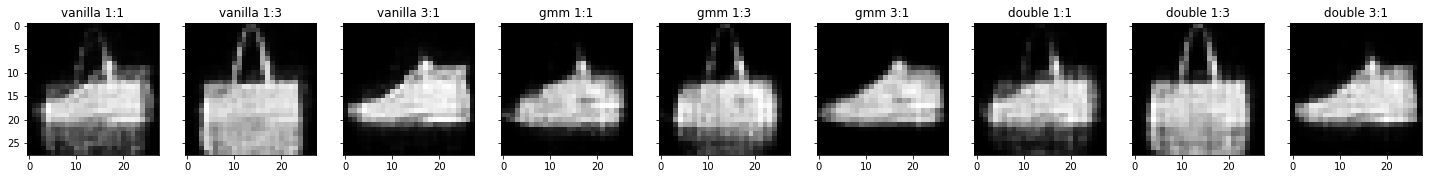

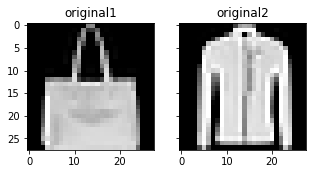

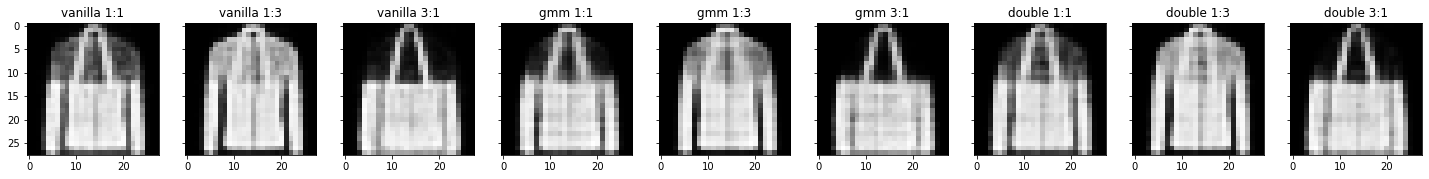

In [96]:
def get_gmm_combo(model, mu1, mu2, ratio=(1,1)):
    mu1 = mu1.unsqueeze(0)
    mu2 = mu2.unsqueeze(0)
    weights = torch.softmax(model.gmm.weights, dim=1)
    weights = torch.stack(torch.tensor_split(model.gmm.weights, model.gmm.num_weights,dim=1), dim=1).repeat(1,1,mu1.shape[-1])
    weights1 = (ratio[0] * weights) / (ratio[0] + ratio[1])
    weights2 = (ratio[1] * weights) / (ratio[0] + ratio[1])
    return (mu1 * weights1 + mu2 * weights2).sum(dim=2)
    
vanilla_model.eval()
gmm_model.eval()
double_model.eval()
for i in range(1,5):
    x1 = images[i]
    x2 = images[i+1]
    (vanilla_mu1, _), _ = vanilla_model(x1.cuda())
    (gmm_mu1, _), _, weights = gmm_model(x1.cuda())
    (_, _), (double_mu1, _), _ = double_model(x1.cuda())
    (vanilla_mu2, _), _ = vanilla_model(x2.cuda())
    (gmm_mu2, _), _, weights = gmm_model(x2.cuda())
    (_, _), (double_mu2, _), _ = double_model(x2.cuda())

    vanilla_combo1 = vanilla_model.decoder((vanilla_mu1+vanilla_mu2)/2)
    vanilla_combo2 = vanilla_model.decoder((vanilla_mu1+vanilla_mu2*3)/4)
    vanilla_combo3 = vanilla_model.decoder((vanilla_mu1*3+vanilla_mu2)/4)
    gmm_combo1 = gmm_model.decoder(get_gmm_combo(gmm_model, gmm_mu1, gmm_mu2, (1,1)))
    gmm_combo2 = gmm_model.decoder(get_gmm_combo(gmm_model, gmm_mu1, gmm_mu2, (1,3)))
    gmm_combo3 = gmm_model.decoder(get_gmm_combo(gmm_model, gmm_mu1, gmm_mu2, (3,1)))
    double_combo1 = double_model.decoder((double_mu1+double_mu2)/2)
    double_combo2 = double_model.decoder((double_mu1+double_mu2*3)/4)
    double_combo3 = double_model.decoder((double_mu1*3+double_mu2)/4)

    utils.display([x1, x2], 2, ['original1', 'original2'], size=(5,5))
    utils.display([vanilla_combo1, vanilla_combo2, vanilla_combo3,
                   gmm_combo1, gmm_combo2, gmm_combo3,
                   double_combo1, double_combo2, double_combo3],
                   9, ['vanilla 1:1','vanilla 1:3', 'vanilla 3:1',
                       'gmm 1:1','gmm 1:3', 'gmm 3:1',
                       'double 1:1','double 1:3', 'double 3:1'], size=(25,25))

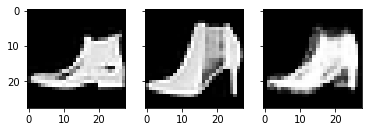

<Figure size 1296x432 with 0 Axes>

In [ ]:
i1=2
i2=4
(mu, sigma), _ = model(images[i1].to(device))
z1 = torch.normal(mu, sigma).to(device)
(mu, sigma), _ = model(images[i2].to(device))
z2 = torch.normal(mu, sigma).to(device)
sample = model.decoder((z1+z2))
display([images[i1], images[i2], sample], 3)

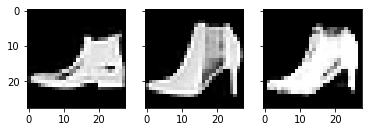

<Figure size 1296x432 with 0 Axes>

In [ ]:
i1=2
i2=4
(mu, sigma), _ = model(images[i1].to(device))
z1 = torch.normal(mu, sigma).to(device)
(mu, sigma), _ = model(images[i2].to(device))
z2 = torch.normal(mu, sigma).to(device)
sample = model.decoder((z1+2*z2))
display([images[i1], images[i2], sample], 3)

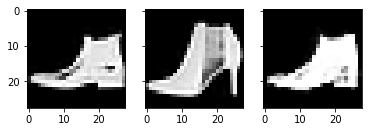

<Figure size 1296x432 with 0 Axes>

In [ ]:
i1=2
i2=4
(mu, sigma), _ = model(images[i1].to(device))
z1 = torch.normal(mu, sigma).to(device)
(mu, sigma), _ = model(images[i2].to(device))
z2 = torch.normal(mu, sigma).to(device)
sample = model.decoder((2*z1+z2))
display([images[i1], images[i2], sample], 3)

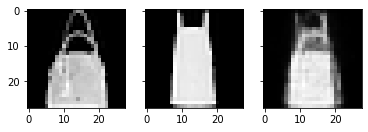

<Figure size 1296x432 with 0 Axes>

In [ ]:
i1=3
i2=6
(mu, sigma), _ = model(images[i1].to(device))
z1 = torch.normal(mu, sigma).to(device)
(mu, sigma), _ = model(images[i2].to(device))
z2 = torch.normal(mu, sigma).to(device)
sample = model.decoder((z1+z2)/2)
display([images[i1], images[i2], sample], 3)

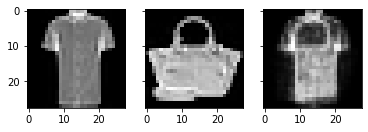

<Figure size 1296x432 with 0 Axes>

In [ ]:
i1=10
i2=35
(mu, sigma), _ = model(images[i1].to(device))
z1 = torch.normal(mu, sigma).to(device)
(mu, sigma), _ = model(images[i2].to(device))
z2 = torch.normal(mu, sigma).to(device)
sample = model.decoder((2*z1+z2)/2)
display([images[i1], images[i2], sample], 3)